In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_scores
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
file_path = "data/communities.data"
data = pd.read_csv(file_path, header=None, na_values=['?'])

In [4]:
data.head(5)

columns = ["state", "county", "community", "communityname", "fold", "population", "householdsize", "racepctblack", "racePctWhite", "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5", "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5", "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly", "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop", "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp", "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits", "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens", "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr", "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop", "ViolentCrimesPerPop"]

In [5]:
data.columns = columns

In [6]:
data.head(5)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


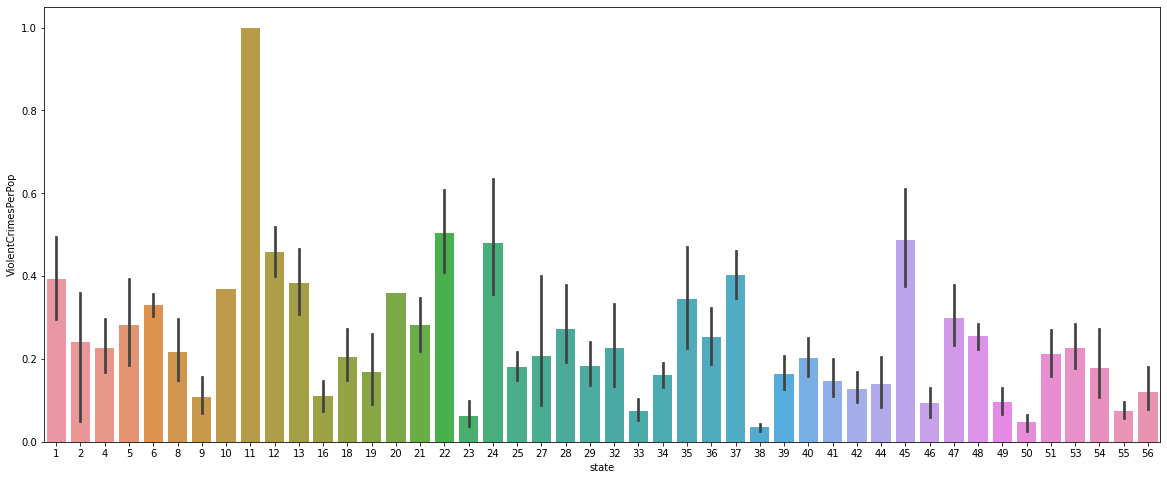

In [7]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="state", y="ViolentCrimesPerPop", data=data)
plt.show()

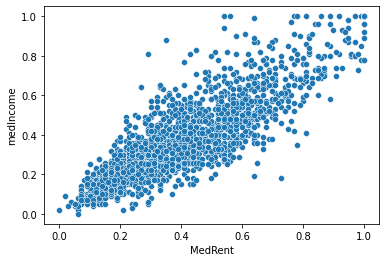

In [8]:
ax = sns.scatterplot(x="MedRent", y = "medIncome", data=data)
plt.show()

## EDA and data cleaning


In [9]:
input_df = data.drop(columns=['state','county','community','communityname', 'fold']).copy()

In [10]:
len(input_df)

1994

In [11]:
# Cehck that we don't have any NaN entries in the data
input_df.isna().sum()

population                0
householdsize             0
racepctblack              0
racePctWhite              0
racePctAsian              0
                       ... 
LemasPctPolicOnPatr    1675
LemasGangUnitDeploy    1675
LemasPctOfficDrugUn       0
PolicBudgPerPop        1675
ViolentCrimesPerPop       0
Length: 123, dtype: int64

In [12]:
missing_counts = zip(input_df.columns.values.tolist(), input_df.isnull().sum(axis=0).tolist())
missing_list = sorted(missing_counts, key=lambda x: x[1], reverse=True)
missing_list

[('LemasSwornFT', 1675),
 ('LemasSwFTPerPop', 1675),
 ('LemasSwFTFieldOps', 1675),
 ('LemasSwFTFieldPerPop', 1675),
 ('LemasTotalReq', 1675),
 ('LemasTotReqPerPop', 1675),
 ('PolicReqPerOffic', 1675),
 ('PolicPerPop', 1675),
 ('RacialMatchCommPol', 1675),
 ('PctPolicWhite', 1675),
 ('PctPolicBlack', 1675),
 ('PctPolicHisp', 1675),
 ('PctPolicAsian', 1675),
 ('PctPolicMinor', 1675),
 ('OfficAssgnDrugUnits', 1675),
 ('NumKindsDrugsSeiz', 1675),
 ('PolicAveOTWorked', 1675),
 ('PolicCars', 1675),
 ('PolicOperBudg', 1675),
 ('LemasPctPolicOnPatr', 1675),
 ('LemasGangUnitDeploy', 1675),
 ('PolicBudgPerPop', 1675),
 ('OtherPerCap', 1),
 ('population', 0),
 ('householdsize', 0),
 ('racepctblack', 0),
 ('racePctWhite', 0),
 ('racePctAsian', 0),
 ('racePctHisp', 0),
 ('agePct12t21', 0),
 ('agePct12t29', 0),
 ('agePct16t24', 0),
 ('agePct65up', 0),
 ('numbUrban', 0),
 ('pctUrban', 0),
 ('medIncome', 0),
 ('pctWWage', 0),
 ('pctWFarmSelf', 0),
 ('pctWInvInc', 0),
 ('pctWSocSec', 0),
 ('pctWPubAsst

In [13]:
columns_to_delete = [name for name, count in missing_list if count == 1675]
columns_to_delete


['LemasSwornFT',
 'LemasSwFTPerPop',
 'LemasSwFTFieldOps',
 'LemasSwFTFieldPerPop',
 'LemasTotalReq',
 'LemasTotReqPerPop',
 'PolicReqPerOffic',
 'PolicPerPop',
 'RacialMatchCommPol',
 'PctPolicWhite',
 'PctPolicBlack',
 'PctPolicHisp',
 'PctPolicAsian',
 'PctPolicMinor',
 'OfficAssgnDrugUnits',
 'NumKindsDrugsSeiz',
 'PolicAveOTWorked',
 'PolicCars',
 'PolicOperBudg',
 'LemasPctPolicOnPatr',
 'LemasGangUnitDeploy',
 'PolicBudgPerPop']

In [14]:
temp_df = input_df.copy()
temp_df = temp_df.drop(columns=["ViolentCrimesPerPop"])

In [15]:
# Impute data - fills NaN values by using known columns
imp_mean = IterativeImputer(random_state=42, sample_posterior=True, n_nearest_features=5)
# imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

new_data = imp_mean.fit_transform(temp_df)

In [16]:
new_data

array([[0.19      , 0.33      , 0.02      , ..., 0.5       , 0.32      ,
        0.14      ],
       [0.        , 0.16      , 0.12      , ..., 0.18651639, 0.        ,
        0.31634688],
       [0.        , 0.42      , 0.49      , ..., 1.47042645, 0.        ,
        0.25737207],
       ...,
       [0.16      , 0.37      , 0.25      , ..., 0.        , 0.91      ,
        0.28      ],
       [0.08      , 0.51      , 0.06      , ..., 0.        , 0.22      ,
        0.18      ],
       [0.2       , 0.78      , 0.14      , ..., 0.5       , 1.        ,
        0.13      ]])

In [17]:
# Scale all features to [0, 1]
new_data = MinMaxScaler().fit_transform(new_data)

In [18]:
np.isnan(new_data).any()

False

In [19]:
df = pd.DataFrame(new_data, columns=temp_df.columns)

In [20]:
df["ViolentCrimesPerPop"] = input_df["ViolentCrimesPerPop"]

In [21]:
df.isnull().sum()

population             0
householdsize          0
racepctblack           0
racePctWhite           0
racePctAsian           0
                      ..
LemasPctPolicOnPatr    0
LemasGangUnitDeploy    0
LemasPctOfficDrugUn    0
PolicBudgPerPop        0
ViolentCrimesPerPop    0
Length: 123, dtype: int64

In [22]:
# Delete columns with high % of missed data
# df = df.drop(columns=columns_to_delete)

# delete one sample with missed data
# df = df.dropna()

In [23]:
df.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,...,0.065231,0.232854,0.161685,0.298324,0.223901,0.506860,0.539282,0.094052,0.396564,0.237979
std,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,0.179185,...,0.109459,0.203092,0.229055,0.115010,0.080505,0.155842,0.164727,0.240328,0.128481,0.232985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,0.300000,...,0.020000,0.100000,0.020000,0.229125,0.176444,0.404015,0.411070,0.000000,0.314558,0.070000
50%,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,0.420000,...,0.040000,0.170000,0.070000,0.293785,0.228234,0.515094,0.549039,0.000000,0.386954,0.150000
75%,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,0.530000,...,0.070000,0.280000,0.190000,0.351721,0.259416,0.614948,0.650908,0.000000,0.471670,0.330000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


/tmp/ipykernel_18005/1685658689.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

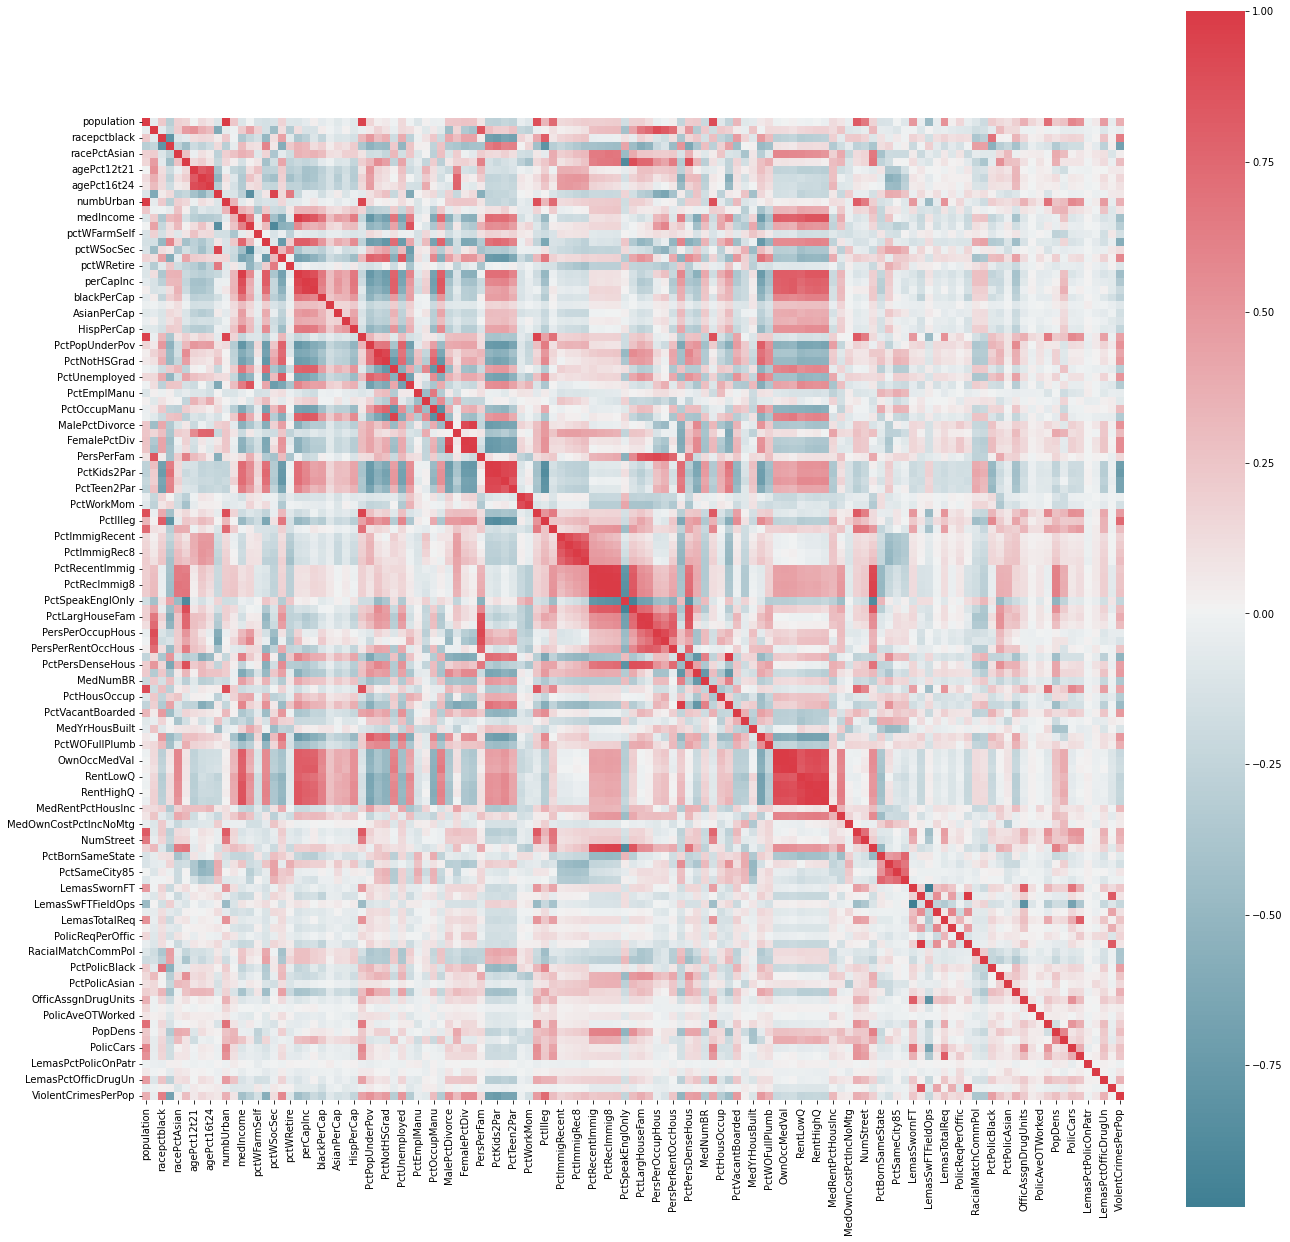

In [24]:
# Check correlated features

corr = df.corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [25]:
df = df.drop(columns=[
    "RentLowQ",
    "RentHighQ",
    "MedRent",
    "MedRentPctHousInc",
    "MedOwnCostPctInc",
    "MedOwnCostPctIncNoMtg",
    "PctImmigRec10",
    "PctImmigRec8",
    "PctImmigRec5",
    "PctRecImmig10",
    "PctRecImmig8",
    "PctRecImmig5",
    "OwnOccLowQuart",
    "OwnOccMedVal",
    "OwnOccHiQuart",
    "PctKids2Par",
    "PctYoungKids2Par",
    "PctTeen2Par",
    "agePct12t21",
    "agePct12t29",
    "agePct16t24",
    "agePct65up",
#     "PctSpeakEnglOnly",
#     "PctNotSpeakEnglWell",
#     "PctLargHouseFam",
#     "PctLargHouseOccup",
#     "PersPerOccupHous",
#     "PersPerOwnOccHous",
#     "PersPerRentOccHous",
#     "PctPersOwnOccup",
#     "medFamInc",
#     "perCapInc",
#     "whitePerCap",
#     "blackPerCap",
#     "indianPerCap",
#     "AsianPerCap",
#     "OtherPerCap",
#     "HispPerCap",
]
)

/tmp/ipykernel_18005/2193669934.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

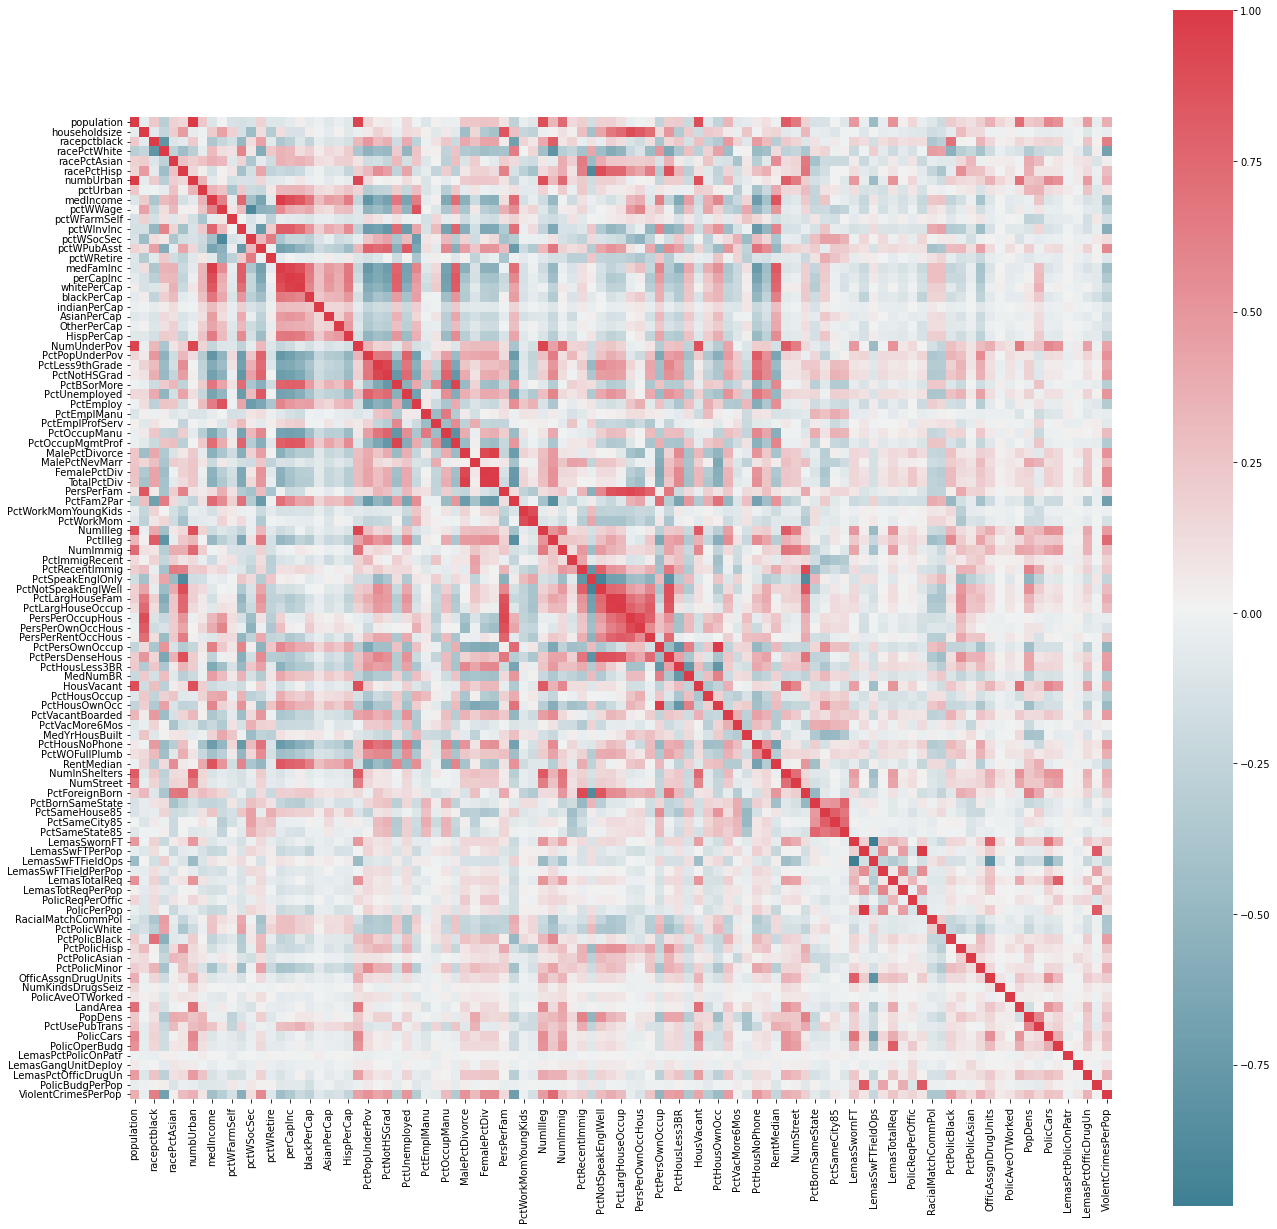

In [26]:
corr = df.corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [27]:
train_data, testval_data = train_test_split(df, test_size=0.2)
test_data, val_data = train_test_split(testval_data, test_size=0.5)

In [28]:
print(f"Train: {len(train_data)}, Val: {len(test_data)}, Test: {len(val_data)}") 

Train: 1595, Val: 199, Test: 200


# 2-3. Linear Regression model 

In [29]:
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_val, y_val = val_data.iloc[:, :-1], val_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [30]:
print(X_train.shape, y_train.shape)

(1595, 100) (1595,)


In [31]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val,y_pred)

print("Mean squared error on val set :", mse)

Mean squared error on val set : 0.01589754915390053


In [33]:
r2_metric = r2_score(y_val,y_pred)

print("r2_score on val set :", r2_metric)

r2_score on val set : 0.6190464411708811


# 4. Polynomial Features

In [34]:
ridge_regression = RidgeCV
lambdas = 10**np.linspace(10,-2,100)*0.5

# Using RidgeCV for 5-Fold Cross validation
ridge_model = ridge_regression(alphas=lambdas, fit_intercept=True, normalize=False, cv = 5)
ridge_model.fit(X_train,y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=5)

In [35]:
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Lambda value with least cv error ",ridge_model.alpha_)
print("Test set error for the chosen lambda value ",mse)

r2_metric = r2_score(y_test,y_pred)

print("r2_score on test set :", r2_metric)

Lambda value with least cv error  7.087370814634009
Test set error for the chosen lambda value  0.021904874470087665
r2_score on test set : 0.6710387101218697


In [36]:
def model_plot(
    train_score, val_scores, points, chosen_point, x_name, y_name, title):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = val_scores, x = points, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = points, 
                 label = 'training_data')
    plt.axvline(x=chosen_point, linestyle='--')

    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.legend()
    plt.show()

In [37]:
linear_regression = LinearRegression()

def polymodel_search(degrees, X_train, y_train, X_val, y_val, draw_plot = True):
    
    train_scores = []
    val_scores = []
    
    for degree in degrees:
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        
        pipeline = Pipeline(
            [
                ("polynomial_features", polynomial_features),
                ("linear_regression", linear_regression),
            ]
        )
        pipeline.fit(X_train, y_train)
        
        y_pred = pipeline.predict(X_train)
        train_scores.append(r2_score(y_pred, y_train))
        
        y_pred = pipeline.predict(X_val)
        val_scores.append(r2_score(y_pred, y_val))
    
    chosen_id = np.argmax(val_scores)
    chosen_degree = degrees[chosen_id]
    max_validation_score = np.max(val_scores)
    
    val_score_at_chosen_alpha = val_scores[chosen_id]

    if draw_plot:
        model_plot(train_scores, val_scores, degrees, chosen_degree, "Degree", "R^2 score", "R2 score vs Degree")
    

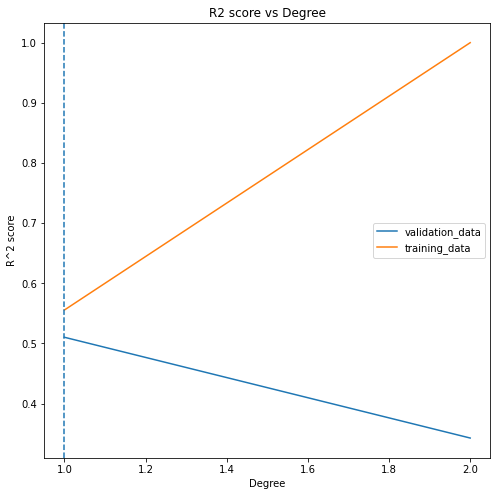

In [38]:
degrees = [1, 2]

polymodel_search(degrees, X_train, y_train, X_val, y_val)

# 5. Regularization

In [39]:
reg_model_cls = Ridge
metric = r2_score

def regmodel_param_search(alphas, X, y, X_val, y_val, draw_plot = True):
    
    train_scores = []
    val_scores = []
    
    for curr_alpha in alphas:
        reg_model = reg_model_cls(alpha = curr_alpha)
        
        reg_model.fit(X,y)
        
        y_pred_train = reg_model.predict(X_train)
        y_pred_val = reg_model.predict(X_val)
        
        metric_train = metric(y_pred_train, y_train)
        metric_val = metric(y_pred_val, y_val)
        
        train_scores.append(metric_train)
        val_scores.append(metric_val)
    
    chosen_alpha_id = np.argmax(val_scores)
    chosen_alpha = alphas[chosen_alpha_id]
    max_validation_score = np.max(val_scores)
    

    val_score_at_chosen_alpha = val_scores[chosen_alpha_id]

    if draw_plot:
        model_plot(train_scores, val_scores, alphas, chosen_alpha, "Reg alpha", "R^2 score", "Ridge reg model")
    
    return chosen_alpha

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


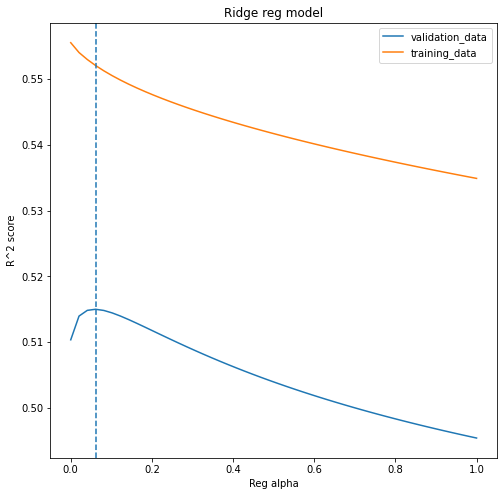

Reg parameter:  0.061224489795918366


In [40]:
alphas = np.linspace(0,1,50)
print(alphas)
max_alpha = regmodel_param_search(alphas, X_train, y_train, X_val, y_val)

print("Reg parameter: ", max_alpha)